<h1 align=center><font size = 7>FINAL PROJECT</font></h1>

##### *JORDI ENAL AMBAT | DBA2300726 | GROUP 106*

## **0 Libraries**

Cell berikut berisi semua _library_ yang akan kita gunakan dan diurutkan mengikuti konvensi [PEP8](https://peps.python.org/pep-0008/).

In [4]:
from pprint import pprint
from time import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from yellowbrick.cluster import SilhouetteVisualizer

## **1 Data Loading & Exploration**

In [5]:
start = time()
df_events = pd.read_csv("C:/Users/Jordi/Desktop/library/venv/events.csv")
df_inventory_items = pd.read_csv(r"C:\Users\Jordi\Desktop\library\venv\inventory_items.csv")
df_order_items = pd.read_csv("C:\\Users\\Jordi\\Desktop\\library\\venv\\order_items.csv")
end = time()

print("Done loading all datasets in {:.3f}s".format(end-start))

Done loading all datasets in 11.050s


In [6]:
print("num of events:", df_events.shape[0])
print("num of inventory_items:", df_inventory_items.shape[0])
print("num of order_items:", df_order_items.shape[0])

num of events: 2418734
num of inventory_items: 487394
num of order_items: 180508


### 1.1 Events

In [7]:
with pd.option_context("display.max_columns", None):
    display(df_events.head())

,id,user_id,sequence_number,session_id,created_at,ip_address,city,state,postal_code,browser,traffic_source,uri,event_type
0,252,14.0,1,4ee0d7d3-ed29-4b1c-b038-1e3f78942acd,2020-08-18 08:46:32+00:00,138.65.151.151,Daejeon,Daejeon,302-160,Chrome,Email,/home,home
1,4473,301.0,1,a77d6232-0a03-4616-b836-446a32b9e4f4,2020-08-19 03:47:46+00:00,153.204.205.22,São Luís,Maranhão,65000-000,IE,Email,/home,home
2,5756,401.0,1,0e517fbd-e152-4918-8f01-6036a180813c,2020-06-07 07:03:58+00:00,209.47.200.122,Sant Adrià de Besòs,Cataluña,8930,Chrome,Email,/home,home
3,8944,683.0,1,4c2fada8-7095-4de2-9728-31c0eed658b0,2020-09-23 04:52:13+00:00,60.42.59.118,Inhambupe,Bahia,48490-000,Chrome,Email,/home,home
4,9164,709.0,1,5a9c26be-01e9-4918-a908-77476667faa2,2021-07-29 16:05:33+00:00,194.208.170.21,Bayreuth,Bayern,95448,IE,Email,/home,home


In [8]:
# Pilih indeks pertama pada df_article
df_events.loc[0]

id                                                  252
user_id                                            14.0
sequence_number                                       1
session_id         4ee0d7d3-ed29-4b1c-b038-1e3f78942acd
created_at                    2020-08-18 08:46:32+00:00
ip_address                               138.65.151.151
city                                            Daejeon
state                                           Daejeon
postal_code                                     302-160
browser                                          Chrome
traffic_source                                    Email
uri                                               /home
event_type                                         home
Name: 0, dtype: object

In [9]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2418734 entries, 0 to 2418733
Data columns (total 13 columns):
 #   Column           Dtype  
---  ------           -----  
 0   id               int64  
 1   user_id          float64
 2   sequence_number  int64  
 3   session_id       object 
 4   created_at       object 
 5   ip_address       object 
 6   city             object 
 7   state            object 
 8   postal_code      object 
 9   browser          object 
 10  traffic_source   object 
 11  uri              object 
 12  event_type       object 
dtypes: float64(1), int64(2), object(10)
memory usage: 239.9+ MB


> **Insights:**

* Pada data artikel, terdapat 25 fitur yang merepresentasikan informasi tentang artikel tersebut, yaitu nama produk, warna produk, deskripsi produk, dan sebagainya.

* Sayangnya, tidak ada data dictionary yang tersedia, sehingga kita sedikit kesulitan mengartikan masing-masing fitur.

* Hampir semua fitur tidak memiliki missing values. Hanya fitur `detail_desc` yang memiliki beberapa _missing values_ (105126 dari 105542)

### 1.2 Inventory_Items

In [10]:
df_inventory_items.head()

,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id
0,90967,16898,2021-07-19 02:20:10+00:00,2021-07-20 14:34:10+00:00,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.0,Men,22811EE19846217512507785E74D12CC,3
1,90968,16898,2020-04-13 07:46:00+00:00,NaN,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.0,Men,22811EE19846217512507785E74D12CC,3
2,90969,16898,2020-09-02 17:43:00+00:00,NaN,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.0,Men,22811EE19846217512507785E74D12CC,3
3,90970,16898,2021-08-19 15:17:00+00:00,NaN,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.0,Men,22811EE19846217512507785E74D12CC,3
4,96715,16898,2020-05-09 11:16:10+00:00,2020-06-23 23:59:10+00:00,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.0,Men,22811EE19846217512507785E74D12CC,3


In [11]:
df_inventory_items.tail()

,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id
487389,234443,14392,2020-04-09 17:38:00+00:00,NaN,15.752521,Maternity,La Leche League International Pullover Nursing...,La Leche League Sports Nurising Bra White,35.720001,Women,625D2D3101C23C47A46984741C232FED,9
487390,290890,14392,2021-03-18 14:42:49+00:00,2021-05-15 04:49:49+00:00,15.752521,Maternity,La Leche League International Pullover Nursing...,La Leche League Sports Nurising Bra White,35.720001,Women,625D2D3101C23C47A46984741C232FED,9
487391,290891,14392,2022-04-25 03:04:00+00:00,NaN,15.752521,Maternity,La Leche League International Pullover Nursing...,La Leche League Sports Nurising Bra White,35.720001,Women,625D2D3101C23C47A46984741C232FED,9
487392,301361,14392,2021-05-15 11:44:11+00:00,2021-06-27 04:00:11+00:00,15.752521,Maternity,La Leche League International Pullover Nursing...,La Leche League Sports Nurising Bra White,35.720001,Women,625D2D3101C23C47A46984741C232FED,9
487393,301362,14392,2020-06-22 15:50:00+00:00,NaN,15.752521,Maternity,La Leche League International Pullover Nursing...,La Leche League Sports Nurising Bra White,35.720001,Women,625D2D3101C23C47A46984741C232FED,9


In [12]:
df_inventory_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487394 entries, 0 to 487393
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              487394 non-null  int64  
 1   product_id                      487394 non-null  int64  
 2   created_at                      487394 non-null  object 
 3   sold_at                         180508 non-null  object 
 4   cost                            487394 non-null  float64
 5   product_category                487394 non-null  object 
 6   product_name                    487359 non-null  object 
 7   product_brand                   487020 non-null  object 
 8   product_retail_price            487394 non-null  float64
 9   product_department              487394 non-null  object 
 10  product_sku                     487394 non-null  object 
 11  product_distribution_center_id  487394 non-null  int64  
dtypes: float64(2), i

> **Insights:**

* Pada data customer, terdapat 7 fitur yang merepresentasikan informasi tentang customer, seperti umur, status keanggotaan, dan lainnya.

* Dari informasi di atas, terlihat bahwa hampir semua fitur yang ada pada `df_inventory_items` memiliki _missing values_. 

* Fitur yang paling banyak memiliki _missing values_ adalah `Active`, sedangkan fitur yang tidak memiliki _missing values_ adalah `customer_id` dan `postal_code`.

* Sama seperti data artikel, dikarenakan tidak ada data dictionary yang tersedia, sehingga kita akan sedikit kesulitan mengartikan masing-masing fitur.

* Untuk mengetahui representasi masing-masing fitur, kita perlu melihat nilai-nilai yang ada di masing-masing fitur tersebut

### 1.3 order_items

In [13]:
with pd.option_context("display.max_columns", None):
    display(df_order_items.head())

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price
0,59347,41038,33153,13606,160256,Shipped,2020-01-05 08:14:27+00:00,2020-01-06 20:56:00+00:00,NaN,NaN,2.5
1,101072,69979,56200,13606,272958,Shipped,2022-05-17 07:06:19+00:00,2022-05-19 10:42:00+00:00,NaN,NaN,2.5
2,63687,44006,35515,13606,171991,Complete,2021-01-21 04:56:58+00:00,2021-01-19 07:16:00+00:00,2021-01-22 03:38:00+00:00,NaN,2.5
3,16338,11275,9230,13606,44149,Cancelled,2022-05-31 08:55:48.353609+00:00,NaN,NaN,NaN,2.5
4,85756,59418,47846,13606,231665,Cancelled,2022-05-22 11:36:45+00:00,NaN,NaN,NaN,2.5


In [14]:
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180508 entries, 0 to 180507
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 180508 non-null  int64  
 1   order_id           180508 non-null  int64  
 2   user_id            180508 non-null  int64  
 3   product_id         180508 non-null  int64  
 4   inventory_item_id  180508 non-null  int64  
 5   status             180508 non-null  object 
 6   created_at         180508 non-null  object 
 7   shipped_at         117502 non-null  object 
 8   delivered_at       63035 non-null   object 
 9   returned_at        17752 non-null   object 
 10  sale_price         180508 non-null  float64
dtypes: float64(1), int64(5), object(5)
memory usage: 15.1+ MB


* Pada data transaksi, terdapat 5 fitur yang merepresentasikan sebuah transaksi, seperti tanggal  transaksi, nomor customer, dan nomor artikel, harga artikel, dan channel penjualan.

* Karena jumlah baris yang sangat banyak (**~31 juta baris**), fungsi `info` tidak bisa menampilkan jumlah non-missing values.

* Dengan kode di samping, isna().sum(), untuk setiap fitur pada data transaksi, tidak terdapat missing values sama sekali


In [15]:
df_order_items.isna().sum()

id                        0
order_id                  0
user_id                   0
product_id                0
inventory_item_id         0
status                    0
created_at                0
shipped_at            63006
delivered_at         117473
returned_at          162756
sale_price                0
dtype: int64

> **Insights:**

Terlihat bahwa tidak ada missing values pada setiap kolom pada data transaksi di atas.

## **2 Exploratory Data Analysis**

* Karena terdapat 3 dataset yang saling melengkapi satu sama lain, kita akan melakukan eksplorasi untuk ketiga dataset tersebut.

* Khusus untuk eksplorasi pada **data transaksi**, kita akan gabungkan terlebih dahulu data customer dan artikel dengan data transaksi, sehingga setiap baris pada data transaksi akan terdiri dari gabungan fitur-fitur dari data customer, artikel, dan transaksi.

> Langkah-langkah yang akan kita lakukan untuk EDA adalah sebagai berikut:
* Eksplor data artikel, seperti jumlah (unik) artikel yang tersedia, jenis warna yang tersedia pada suatu produk, jenis garmen, dan lainnya
* Eksplor data customer, seperti rentang umur customer, jumlah customer yang mendapatkan newsletter, status keanggotaan, dan lainnya
* Eksplor data transaksi yang mencakup jumlah pembelian harian / bulanan / tahunan, produk terpopuler, CLV, dan lainnya

Pertama-tama, kita akan coba eksplor data artikel terlebih dahulu.

### 2.1 Data: events
* Jika kita perhatikan dari tipe data tiap fitur, fitur-fitur yang berisi kode atau identifier produk dianggap sebagai integer, sedangkan secara konteks adalah bukan integer. Oleh karena itu, kita akan mengubah beberapa fitur tersebut menjadi tipe data `object`.

In [16]:
df_events.dtypes

id                   int64
user_id            float64
sequence_number      int64
session_id          object
created_at          object
ip_address          object
city                object
state               object
postal_code         object
browser             object
traffic_source      object
uri                 object
event_type          object
dtype: object

* Jika kita perhatikan fitur `article_id`, `product_code`, `product_type_no`, dan sejenisnya bertipe data integer. Fitur tersebut seharusnya bertipe data kategorik karena tidak mencerminkan deret angka. Oleh karena itu, kita akan coba ubah tipe data fitur tersebut menjadi object.

In [17]:
# Instruksi looping untuk mengubah tipe data pada kolom yang berakhiran dengan 'id','no', dan 'code' menggunakan function astype()
for feature in df_events.columns:
    if (
        feature.endswith("id")
        or feature.endswith("no")
        or feature.endswith("code")
    ):
        df_events[feature] = df_events[feature].astype("object")

In [18]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2418734 entries, 0 to 2418733
Data columns (total 13 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   id               object
 1   user_id          object
 2   sequence_number  int64 
 3   session_id       object
 4   created_at       object
 5   ip_address       object
 6   city             object
 7   state            object
 8   postal_code      object
 9   browser          object
 10  traffic_source   object
 11  uri              object
 12  event_type       object
dtypes: int64(1), object(12)
memory usage: 239.9+ MB


* Setelah konversi tipe data, terlihat bahwa semua fitur dalam data artikel tidak ada yang berjenis numerik.

In [19]:
for feature in df_events.columns:
    print(
        f"- num of unique values in `{feature}`:",
        df_events[feature].nunique()
    )

- num of unique values in `id`: 2418734
- num of unique values in `user_id`: 79986
- num of unique values in `sequence_number`: 13
- num of unique values in `session_id`: 680508
- num of unique values in `created_at`: 2032773
- num of unique values in `ip_address`: 680444
- num of unique values in `city`: 8781
- num of unique values in `state`: 231
- num of unique values in `postal_code`: 17317
- num of unique values in `browser`: 5
- num of unique values in `traffic_source`: 5
- num of unique values in `uri`: 35530
- num of unique values in `event_type`: 6


In [20]:
df_events.isna().sum()

id                       0
user_id            1125498
sequence_number          0
session_id               0
created_at               0
ip_address               0
city                 23862
state                    0
postal_code              0
browser                  0
traffic_source           0
uri                      0
event_type               0
dtype: int64

In [21]:
df_events = df_events.dropna()

In [22]:
df_events.isna().sum()

id                 0
user_id            0
sequence_number    0
session_id         0
created_at         0
ip_address         0
city               0
state              0
postal_code        0
browser            0
traffic_source     0
uri                0
event_type         0
dtype: int64

> **Insights:**

Dari informasi di atas:
* terdapat perbedaan jumlah nilai unik antara beberapa pasangan kode dan nama, seperti `product_code` dengan `prod_name`, `product_type_no` dengan `product_type_name`, `department_no` dengan `department_name`, dan lainnya. Sehingga kita mungkin perlu melihat **two-way table** antara kedua fitur tersebut
* karena `index_group_name` adalah fitur dengan jumlah nilai unik paling sedikit, yang mungkin berarti ada 5 grup besar yang membagi produk H&M
* apa lagi yang bisa kamu ambil dari informasi di atas?

Agar lebih mudah untuk diamati, kita akan buat visualisasi menggunakan fungsi berikut.

In [23]:
def plot_count(data, x=None, y=None, palette=None, figsize=(12, 6), **kwargs):
    column_order = data[x or y].value_counts().index

    plt.figure(figsize=figsize)
    sns.countplot(
        x=x, y=y, data=data, order=column_order,
        palette=palette, **kwargs
    )
    plt.grid(False)


MAIN_COLOR = ["#29B5BF"]    # warna utama untuk visualisasi
OTHER_COLOR = ["#777777"]    # warna lainnya untuk visualisasi

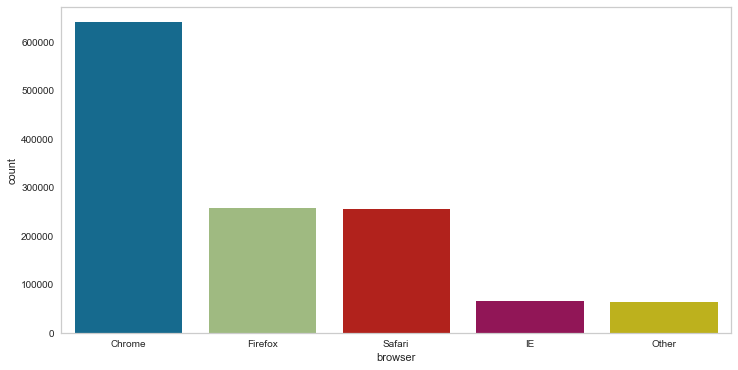

In [24]:
plot_count(x="browser", data=df_events)

> **Insights:**

Dari visualisasi di atas, diperoleh:
* `Ladieswear` atau pakaian untuk perempuan menjadi kelompok grup yang paling banyak disediakan oleh H&M
* sebaliknya, ketersediaan pakaian olahraga atau `'sport'` oleh H&M paling sedikit dibandingkan dengan yang kelompok pakaian lainnya

* Selanjutnya, kita lihat dari nama fitur yang mirip, yaitu  `index_group_name` dengan `index_name`, sekarang kita akan coba bandingkan.

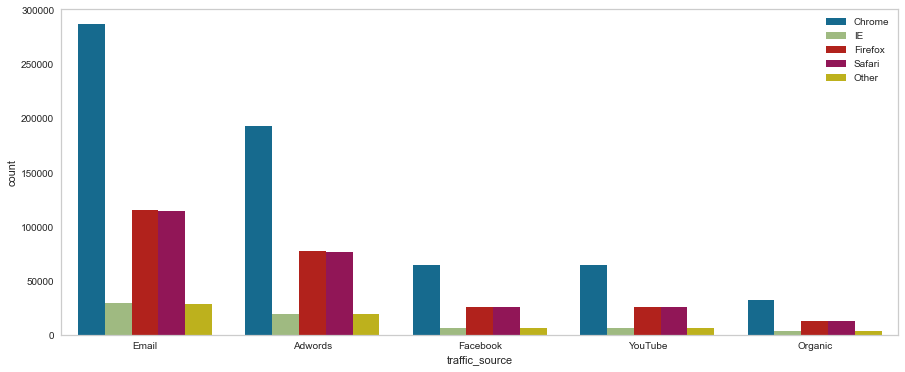

In [25]:
plot_count(x="traffic_source", hue="browser",data=df_events, figsize=(15, 6))
plt.legend(loc="upper right")
plt.show()

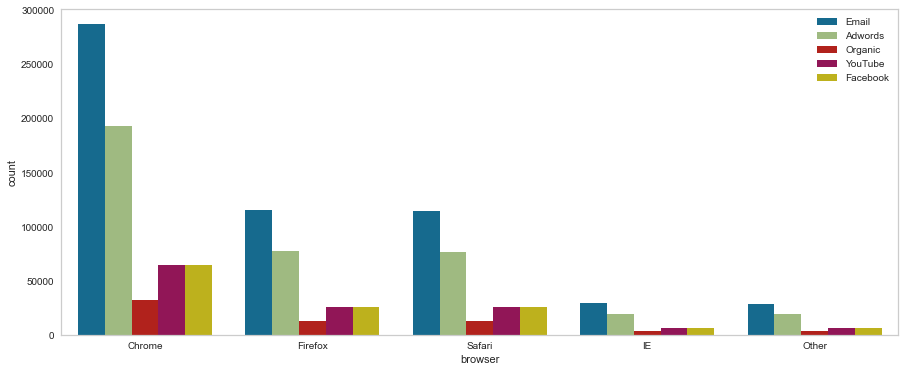

In [26]:
plot_count(x="browser", hue="traffic_source",data=df_events, figsize=(15, 6))
plt.legend(loc="upper right")
plt.show()

### 2.2 Data: inventory_items

Di data inventory_items terdapat banyak nilai _missing values_ , selanjutnya kita akan coba eksplor _missing values_ tersebut.

> Notes. Karena alasan privasi, kita hanya bisa mengeksplor fitur-fitur seperti `FN`, `Active`, `club_member_status`, `fashion_news_frequency`, dan `age`.

#### 2.2.1 Missing Values
Kita akan coba lihat apakah ada pola khusus untuk  _missing values_ pada masing-masing fitur

In [27]:
df_inventory_items[df_inventory_items.isna().all(axis=1)]

,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id


> **Insights:**

Dari data di atas, terlihat bahwa tidak ada baris yang semua nilai fiturnya kosong.

In [28]:
for feature in df_inventory_items.columns:
    # hanya pilih fitur yang memiliki missing values dan tampilkan nilai missing values dan hitung jumlahnya dengan unique()
    if df_inventory_items[feature].isna().any():
        print(f"num of unique values in {feature}: ",
            df_inventory_items[feature].unique())

num of unique values in sold_at:  ['2021-07-20 14:34:10+00:00' nan '2020-06-23 23:59:10+00:00' ...
 '2021-05-10 03:51:49+00:00' '2021-05-15 04:49:49+00:00'
 '2021-06-27 04:00:11+00:00']
num of unique values in product_name:  ["Quiksilver Waterman Men's On The Rise"
 'KEEN Women Bellingham Low Ultralite Sock'
 'Husky Animal Hat with Mittens' ...
 'VH Apparel - Whatever It Takes Charity - Joss Stone Shea Butter And Vitamin E Infused Quarter High Chenille Socks - Black/Artwork'
 "La Leche League Wrap 'N Snap Nursing Bra (4101)"
 'La Leche League International Pullover Nursing Sports Bra']
num of unique values in product_brand:  [nan 'H' 'BB' ... 'VH Apparel - Whatever It Takes Charity'
 'La Leche League International Intimates'
 'La Leche League Sports Nurising Bra White']


In [29]:
df_inventory_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487394 entries, 0 to 487393
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              487394 non-null  int64  
 1   product_id                      487394 non-null  int64  
 2   created_at                      487394 non-null  object 
 3   sold_at                         180508 non-null  object 
 4   cost                            487394 non-null  float64
 5   product_category                487394 non-null  object 
 6   product_name                    487359 non-null  object 
 7   product_brand                   487020 non-null  object 
 8   product_retail_price            487394 non-null  float64
 9   product_department              487394 non-null  object 
 10  product_sku                     487394 non-null  object 
 11  product_distribution_center_id  487394 non-null  int64  
dtypes: float64(2), i

* Sekarang data kita telah lengkap tanpa nilai yang hilang. Selanjutnya, kita akan mencoba eksplor dengan memvisualisasikan fitur-fitur yang ada di data inventory_items untuk mendapatkan insight yang lebih.

#### 2.2.2 Data Visualization

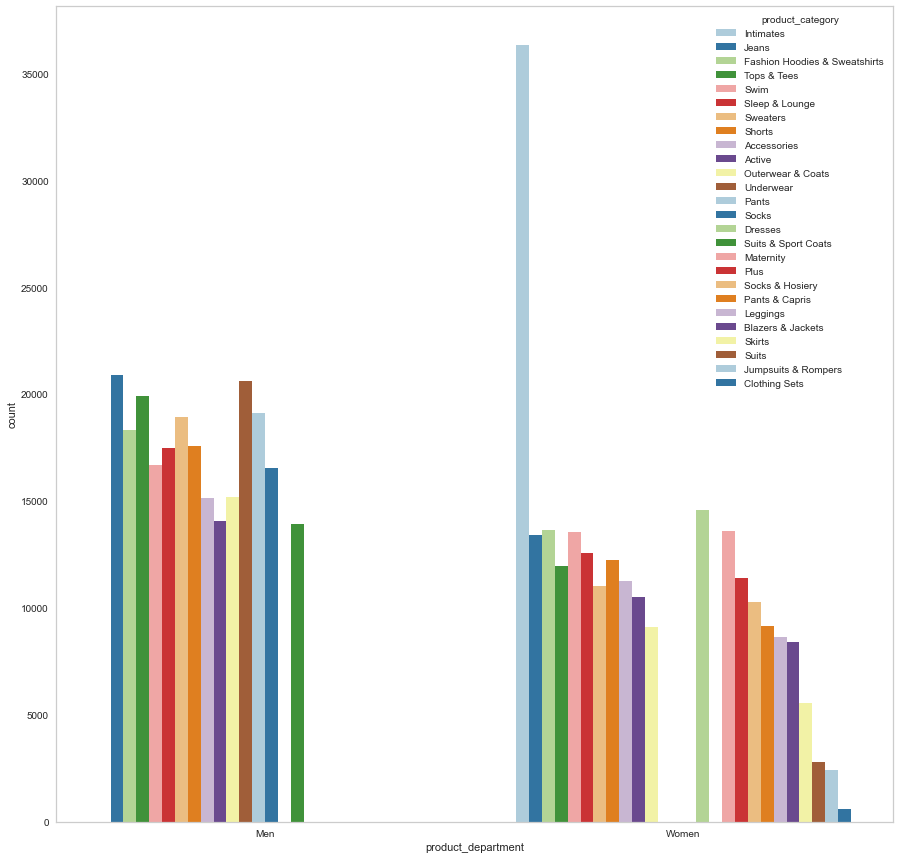

In [30]:
df_ladies_mens = df_inventory_items[df_inventory_items.product_category.isin(["Men", "Women"])
]
plot_count(
    hue="product_category",
    x="product_department",
    data=df_inventory_items,
    palette="Paired",
    figsize=(15, 15),
    hue_order=df_inventory_items.product_category.value_counts().index
)

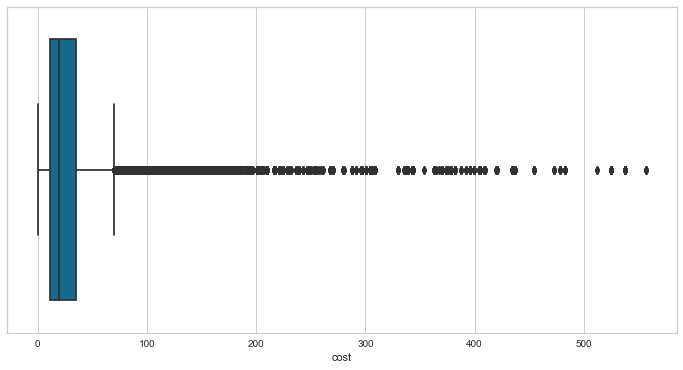

In [31]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="cost", data=df_inventory_items)
plt.show()

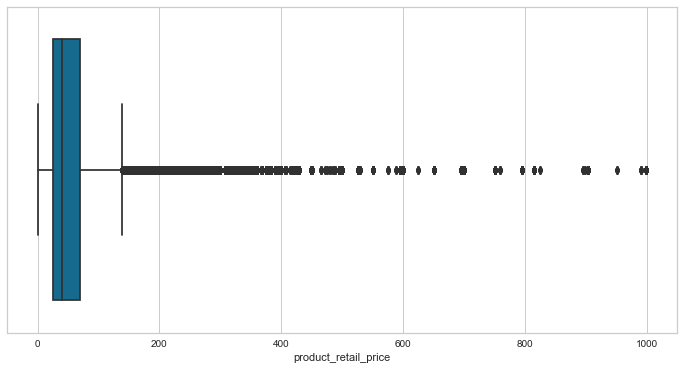

In [32]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="product_retail_price", data=df_inventory_items)
plt.show()

### 2.3 Data: order_items

Jika kita perhatikan sekali lagi informasi data transaksi di samping, terdapat lebih dari 31 juta baris transaksi
Untuk mengolah data sebesar itu, kita mungkin memerlukan resource yang lebih besar juga, seperti RAM, CPU, GPU, dan mungkin library yang lebih mutakhir. Oleh karena itu, pada meeting ini kita hanya akan menggunakan data transaksi di tahun 2020.


* Kita akan lakukan **join** antara data artikel dan customer dengan data transkasi. Kita bisa menggunakan `merge` atau `join` dari Pandas.

* Tapi, sebelum itu, kita akan coba mengubah beberapa tipe data di data transaksi yang mungkin kurang tepat.

In [33]:
df_order_items["created_at"] = df_order_items.created_at.astype("datetime64")
df_order_items["shipped_at"] = df_order_items.shipped_at.astype("datetime64")
df_order_items["delivered_at"] = df_order_items.delivered_at.astype("datetime64")
df_order_items["returned_at"] = df_order_items.returned_at.astype("datetime64")
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180508 entries, 0 to 180507
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   id                 180508 non-null  int64         
 1   order_id           180508 non-null  int64         
 2   user_id            180508 non-null  int64         
 3   product_id         180508 non-null  int64         
 4   inventory_item_id  180508 non-null  int64         
 5   status             180508 non-null  object        
 6   created_at         180508 non-null  datetime64[ns]
 7   shipped_at         117502 non-null  datetime64[ns]
 8   delivered_at       63035 non-null   datetime64[ns]
 9   returned_at        17752 non-null   datetime64[ns]
 10  sale_price         180508 non-null  float64       
dtypes: datetime64[ns](4), float64(1), int64(5), object(1)
memory usage: 15.1+ MB


In [34]:
df_by_day = df_order_items.groupby(df_order_items.created_at.dt.day)
df_by_month = df_order_items.groupby(df_order_items.created_at.dt.month)
df_by_inventory_items = df_inventory_items.groupby("product_id")
df_by_events = df_events.groupby("id")

> Daily Sales

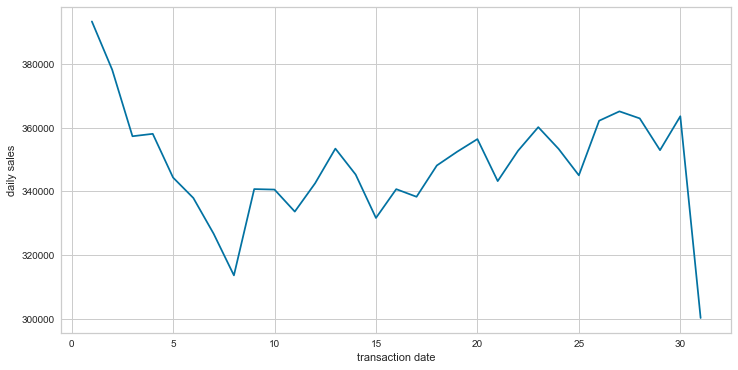

In [35]:
daily_sales = df_by_day.agg(daily_sales=pd.NamedAgg(column="sale_price", aggfunc="sum")).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x="created_at", y="daily_sales", data=daily_sales)
plt.xlabel("transaction date")
plt.ylabel("daily sales")
plt.show()

> Monthly Sales

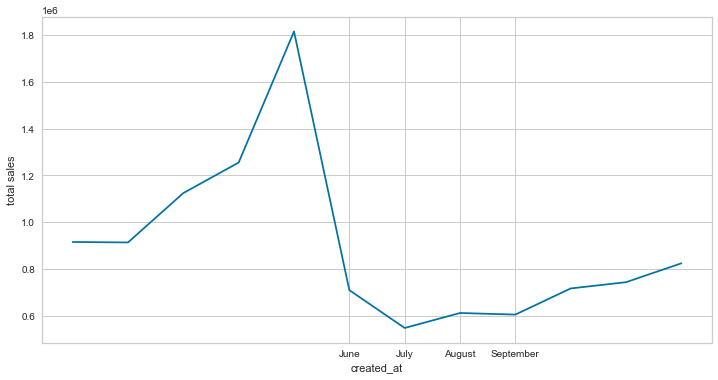

In [36]:
monthly_sales = df_by_month.agg(monthly_sales=pd.NamedAgg(column="sale_price", aggfunc="sum")).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x="created_at", y="monthly_sales", data=monthly_sales)
plt.xticks([6, 7, 8, 9], ["June", "July", "August", "September"])
plt.ylabel("total sales")
plt.show()

In [37]:
df_inventory_items_agg = df_by_inventory_items.agg(
    total_items_bought=pd.NamedAgg(
        column="id", aggfunc=lambda x: len(list(x))
    ),
    count_items_bought=pd.NamedAgg(
        column="id", aggfunc=lambda x: len(set(x))
    ),
    total_spending=pd.NamedAgg(
        column="product_retail_price", aggfunc=lambda x: sum(x)
    ),
    avg_spending=pd.NamedAgg(
        column="product_retail_price", aggfunc=lambda x: np.mean(x)
    ),
    count_buying_day=pd.NamedAgg(
        column="created_at", aggfunc=lambda x: len(set(x))
    ),
    count_colour_bought=pd.NamedAgg(
        column="product_category", aggfunc=lambda x: len(set(x))
    ),
).reset_index()

In [38]:
# Summary statistics dari customer transaction
df_inventory_items_agg.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
product_id,29050.0,14571.326,8405.344,1.00,7293.25,14581.50,21848.75,29120.0
total_items_bought,29050.0,16.778,7.191,2.00,12.00,16.00,21.00,55.0
count_items_bought,29050.0,16.778,7.191,2.00,12.00,16.00,21.00,55.0
total_spending,29050.0,1002.854,1285.649,0.28,323.47,623.72,1188.00,31785.0
avg_spending,29050.0,59.231,65.909,0.02,24.00,39.99,69.95,999.0
count_buying_day,29050.0,16.778,7.191,2.00,12.00,16.00,21.00,55.0
count_colour_bought,29050.0,1.000,0.000,1.00,1.00,1.00,1.00,1.0


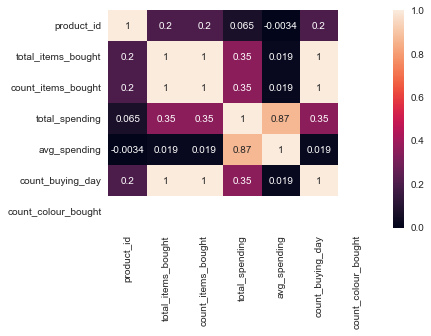

In [39]:
# Visualisasikan hubungan antara variabel numerik pada df_inventory_items_agg
sns.heatmap(df_inventory_items_agg.corr(), annot=True)
plt.show()

In [40]:
df_events_agg = df_by_events.agg(
    total_traffic=pd.NamedAgg(column="id", aggfunc="count"),
    gmv_perdigital_product=pd.NamedAgg(column="sequence_number", aggfunc=lambda x: sum(x)*len(x)),
    count_customer_visit=pd.NamedAgg(
        column="user_id", aggfunc=lambda x: len(set(x))
    )
).reset_index()

In [41]:
df_events_agg.tail(10)

,id,total_traffic,gmv_perdigital_product,count_customer_visit
1280356,1293227,1,1,1
1280357,1293228,1,2,1
1280358,1293229,1,3,1
1280359,1293230,1,4,1
1280360,1293231,1,5,1
1280361,1293232,1,1,1
1280362,1293233,1,2,1
1280363,1293234,1,3,1
1280364,1293235,1,4,1
1280365,1293236,1,5,1


In [42]:
df_events_agg.describe().round(2)

,id,total_traffic,gmv_perdigital_product,count_customer_visit
count,1280366.00,1280366.0,1280366.00,1280366.0
mean,646768.63,1.0,4.62,1.0
std,373421.00,0.0,2.99,0.0
min,1.00,1.0,1.00,1.0
25%,323508.25,1.0,2.00,1.0
50%,646949.50,1.0,4.00,1.0
75%,970226.75,1.0,6.00,1.0
max,1293236.00,1.0,13.00,1.0


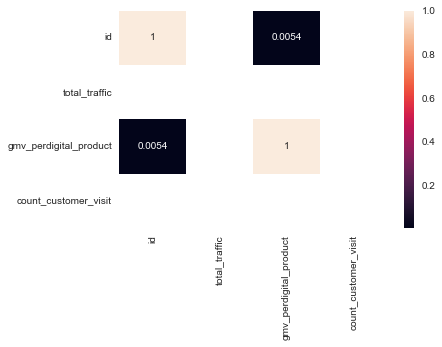

In [43]:
# Visualisasikan hubungan antara variabel numerik pada df_events_agg
sns.heatmap(df_events_agg.corr(), annot=True)
plt.show()

> **Question**

Apa yang bisa kamu ambil dari ringkasan statistik dan visualisasi korelasi antar fitur di atas?

---


# Clustering with Python - Part 2

## 3 Model Development

* Karena kita akan melakukan segmentasi customer, maka data yang dipilih adalah data agregasi customer. 

* Untuk itu, kita akan coba menambahkan beberapa fitur lagi yang mungkin berguna dengan menggabungkannya dengan data customer.

In [44]:
df = pd.read_csv(r"C:\Users\Jordi\Desktop\library\venv\_pricecost.csv")

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3544451 entries, 0 to 3544450
Data columns (total 4 columns):
 #   Column        Dtype  
---  ------        -----  
 0   product_id    float64
 1   retail_price  float64
 2   cost          float64
 3   sale_price    float64
dtypes: float64(4)
memory usage: 108.2 MB


In [46]:
df=df.dropna()

In [47]:
df.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
product_id,3544381.0,15921.401,8348.473,1.000,8841.00,17107.000,23039.00,29120.000
retail_price,3544381.0,60.298,65.885,0.020,24.97,40.000,69.99,999.000
cost,3544381.0,29.000,30.665,0.008,11.50,20.257,34.91,557.151
sale_price,3544381.0,60.298,65.885,0.020,24.97,40.000,69.99,999.000


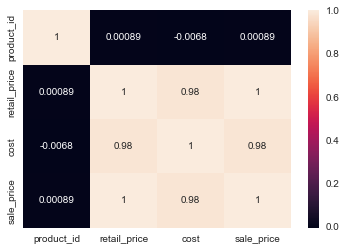

In [48]:
sns.heatmap(df.corr(), annot=True)
plt.show()

### 3.1 Data Preparation

Persiapan data yang akan kita lakukan adalah:
* mengubah fitur kategorik (`club_member_status` dan `fashion_news_frequency`) menjadi matriks one-hot
* melakukan standardisasi semua fitur numerik yang sudah terbentuk

In [49]:
encoder = OneHotEncoder()
encoder.fit(df.select_dtypes(include="object"))
X_onehot = pd.DataFrame(encoder.transform(df.select_dtypes(include="object")).toarray(),columns=encoder.get_feature_names_out())

X_preprocessed = pd.concat([df.select_dtypes(exclude="object"), X_onehot],axis=1)

scaler = StandardScaler()
scaler.fit(X_preprocessed)
X_scaled = pd.DataFrame(scaler.transform(X_preprocessed),columns=X_preprocessed.columns)

X_scaled.describe()

,product_id,retail_price,cost,sale_price
count,3.544381e+06,3.544381e+06,3.544381e+06,3.544381e+06
mean,1.100180e-17,-5.651656e-17,2.507000e-16,-5.651656e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.906984e+00,-9.149058e-01,-9.454300e-01,-9.149058e-01
25%,-8.481075e-01,-5.362151e-01,-5.706791e-01,-5.362151e-01
50%,1.420139e-01,-3.080901e-01,-2.851168e-01,-3.080901e-01
75%,8.525631e-01,1.470975e-01,1.927422e-01,1.470975e-01
max,1.580960e+00,1.424759e+01,1.722331e+01,1.424759e+01


In [50]:
X_scaled = X_scaled.dropna()

### 3.2 K-Means

In [51]:
K = 4
kmeans_4x = KMeans(n_clusters=K, random_state=11)

start = time()
kmeans_4x.fit(X_scaled)
print(f"Done fitting kMeans in {time()-start:.3f}s")

Done fitting kMeans in 10.495s


In [52]:
K = 5
kmeans_5x = KMeans(n_clusters=K, random_state=11)

start = time()
kmeans_5x.fit(X_scaled)
print(f"Done fitting kMeans in {time()-start:.3f}s")

Done fitting kMeans in 17.106s


In [53]:
K = 8
kmeans_8x = KMeans(n_clusters=K, random_state=11)

start = time()
kmeans_8x.fit(X_scaled)
print(f"Done fitting kMeans in {time()-start:.3f}s")

Done fitting kMeans in 27.123s


In [54]:
K = 10
kmeans_10x = KMeans(n_clusters=K, random_state=11)

start = time()
kmeans_10x.fit(X_scaled)
print(f"Done fitting kMeans in {time()-start:.3f}s")

Done fitting kMeans in 32.659s


In [55]:
K = 12
kmeans_12x = KMeans(n_clusters=K, random_state=11)

start = time()
kmeans_12x.fit(X_scaled)
print(f"Done fitting kMeans in {time()-start:.3f}s")

Done fitting kMeans in 37.504s


In [56]:
K = 15
kmeans_15x = KMeans(n_clusters=K, random_state=11)

start = time()
kmeans_15x.fit(X_scaled)
print(f"Done fitting kMeans in {time()-start:.3f}s")

Done fitting kMeans in 48.700s


In [57]:
K = 4
kmeans_4 = KMeans(n_clusters=K, random_state=11)

start = time()
kmeans_4.fit(df)
print(f"Done fitting kMeans in {time()-start:.3f}s")

Done fitting kMeans in 11.859s


In [58]:
K = 5
kmeans_5 = KMeans(n_clusters=K, random_state=11)

start = time()
kmeans_5.fit(df)
print(f"Done fitting kMeans in {time()-start:.3f}s")

Done fitting kMeans in 16.264s


In [59]:
K = 8
kmeans_8 = KMeans(n_clusters=K, random_state=11)

start = time()
kmeans_8.fit(df)
print(f"Done fitting kMeans in {time()-start:.3f}s")

Done fitting kMeans in 23.600s


In [60]:
K = 10
kmeans_10 = KMeans(n_clusters=K, random_state=11)

start = time()
kmeans_10.fit(df)
print(f"Done fitting kMeans in {time()-start:.3f}s")

Done fitting kMeans in 30.286s


In [61]:
K = 12
kmeans_12 = KMeans(n_clusters=K, random_state=11)

start = time()
kmeans_12.fit(df)
print(f"Done fitting kMeans in {time()-start:.3f}s")

Done fitting kMeans in 32.913s


In [62]:
K = 15
kmeans_15 = KMeans(n_clusters=K, random_state=11)

start = time()
kmeans_15.fit(df)
print(f"Done fitting kMeans in {time()-start:.3f}s")

Done fitting kMeans in 36.801s


* Selanjutnya, kita akan membuat kolom baru pada data `X` yang merepresentasikan cluster dari model-model tersebut.

In [63]:
df = df.assign(
    clusters_of_5 = kmeans_5.predict(df),
    clusters_of_10 = kmeans_10.predict(df),
    clusters_of_15 = kmeans_15.predict(df),
)

with pd.option_context("display.max_columns", None):
    display(df.head())

,product_id,retail_price,cost,sale_price,clusters_of_5,clusters_of_10,clusters_of_15
0,16898.0,25.0,13.925,25.0,2,2,0
1,16898.0,25.0,13.925,25.0,2,2,0
2,16898.0,25.0,13.925,25.0,2,2,0
3,16898.0,25.0,13.925,25.0,2,2,0
4,16898.0,25.0,13.925,25.0,2,2,0


In [64]:
X_scaled = X_scaled.assign(
    clusters_of_5x = kmeans_5x.predict(X_scaled),
    clusters_of_10x = kmeans_10x.predict(X_scaled),
    clusters_of_15x = kmeans_15x.predict(X_scaled),
)

with pd.option_context("display.max_columns", None):
    display(df.head())

,product_id,retail_price,cost,sale_price,clusters_of_5,clusters_of_10,clusters_of_15
0,16898.0,25.0,13.925,25.0,2,2,0
1,16898.0,25.0,13.925,25.0,2,2,0
2,16898.0,25.0,13.925,25.0,2,2,0
3,16898.0,25.0,13.925,25.0,2,2,0
4,16898.0,25.0,13.925,25.0,2,2,0


In [65]:
df = df.assign(
    clusters_of_4x=kmeans_4x.predict(X_scaled),
    clusters_of_8x=kmeans_8x.predict(X_scaled),
    clusters_of_12x = kmeans_12x.predict(df)
)

with pd.option_context("display.max_columns", None):
    display(X_scaled.head())

c:\Users\Jordi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- clusters_of_10x
- clusters_of_15x
- clusters_of_5x

  warnings.warn(message, FutureWarning)


ValueError: X has 7 features, but KMeans is expecting 4 features as input.

In [ ]:
df = df.assign(
    clusters_of_4=kmeans_4.predict(df),
    clusters_of_8=kmeans_8.predict(df),
    clusters_of_12 = kmeans_12.predict(df)
)

with pd.option_context("display.max_columns", None):
    display(df.head())

c:\Users\Jordi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- clusters_of_10
- clusters_of_15
- clusters_of_5

  warnings.warn(message, FutureWarning)


ValueError: X has 7 features, but KMeans is expecting 4 features as input.

### 3.3 Visualize Clusters

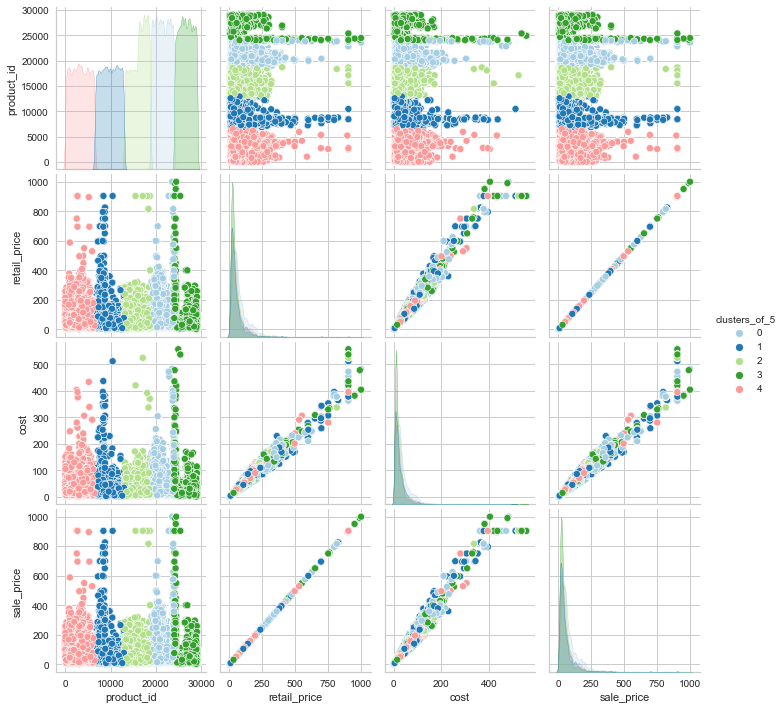

In [66]:
result = df.sample(frac=.2, random_state=11).drop(columns=["clusters_of_15", "clusters_of_10"])
sns.pairplot(result, hue="clusters_of_5", palette="Paired")
plt.show()

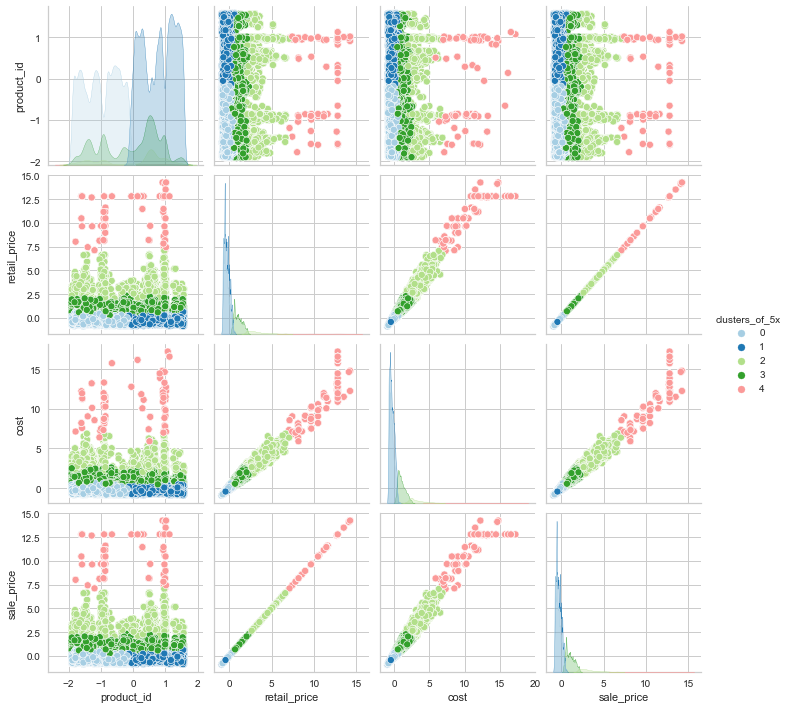

In [67]:
result = X_scaled.sample(frac=.2, random_state=11).drop(columns=["clusters_of_15x", "clusters_of_10x"])
sns.pairplot(result, hue="clusters_of_5x", palette="Paired")
plt.show()

## 4. Model Evaluation

Pada tahap evaluasi model, kita akan coba menganalisis _cardinality_ dan _magnitude_ dari masing-masing clusters di masing-masing model tersebut (k1 = 5, k2 = 15, k3minibatch = 15)

### 4.1 Cluster Cardinality

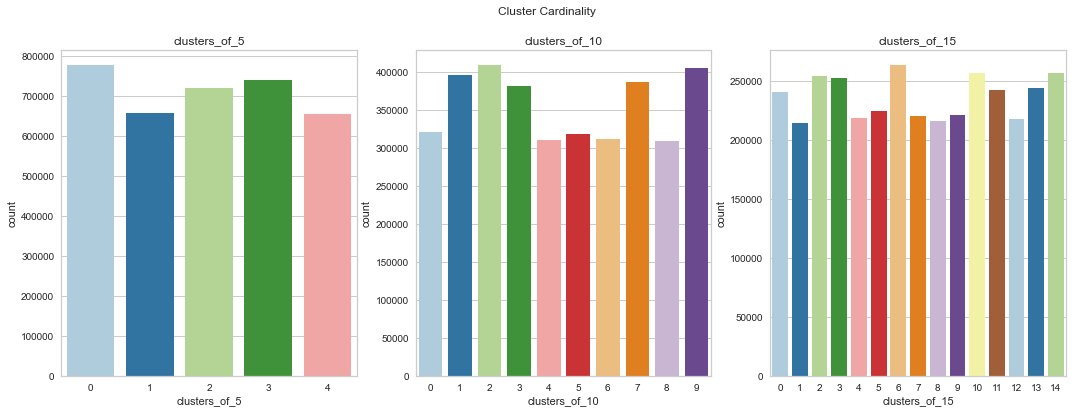

In [68]:
fig, axis = plt.subplots(1, 3, figsize=(18, 6))
for ax, preds in zip(axis, ["clusters_of_5", "clusters_of_10", "clusters_of_15"]):
    sns.countplot(x=preds, data=df, ax=ax, palette="Paired")
    ax.set_title(preds)
plt.suptitle("Cluster Cardinality")
plt.show()

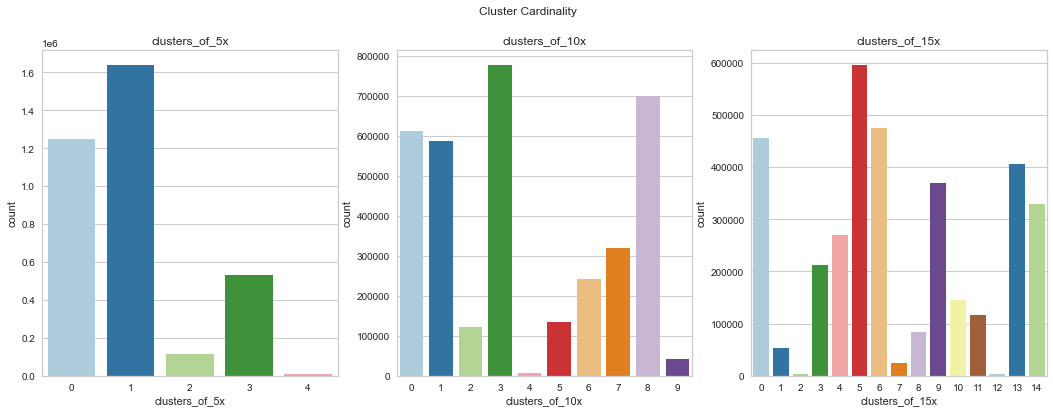

In [69]:
fig, axis = plt.subplots(1, 3, figsize=(18, 6))
for ax, preds in zip(axis, ["clusters_of_5x", "clusters_of_10x", "clusters_of_15x"]):
    sns.countplot(x=preds, data=X_scaled, ax=ax, palette="Paired")
    ax.set_title(preds)
plt.suptitle("Cluster Cardinality")
plt.show()

> **Insights**

Dari visualisasi _cluster cardinality_ di atas:
* Model dengan 5 cluster (k=5), terlihat bahwa terdapat perbedaan cukup jauh antara cluster `0` dan `1` dengan cluster `2`, `3`, dan `4`
* Model dengan 15 cluster (k=15), terlihat kardinalitas cluster `0` sangat jauh lebih banyak dibandingkan dengan cluster yang lain. Sebaliknya, cluster `3`, `4`, `6`, `7`, `8`, dan `10` memiliki jumlah elemen yang jauh lebih kecil
* beberapa cluster dengan kardinalitas yang ekstrim tersebut bisa kita tinjau lebih dalam lagi bagaimana karaketeristik customer di dalamnya. Akan tetapi, karena kita belum menentukan jumlah cluster yang optimal, silakan eksplor secara mandiri

> perlu diperhatikan bahwa nilai kardinalitas yang ekstrim bisa jadi wajar terjadi jika memang sesuai dengan konteks bisnis ([ref](https://towardsdatascience.com/common-mistakes-in-cluster-analysis-and-how-to-avoid-them-eb960116d773))

### 4.2 Cluster Magnitude

c:\Users\Jordi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- clusters_of_10x
- clusters_of_15x
- clusters_of_5x

  warnings.warn(message, FutureWarning)


ValueError: X has 7 features, but KMeans is expecting 4 features as input.

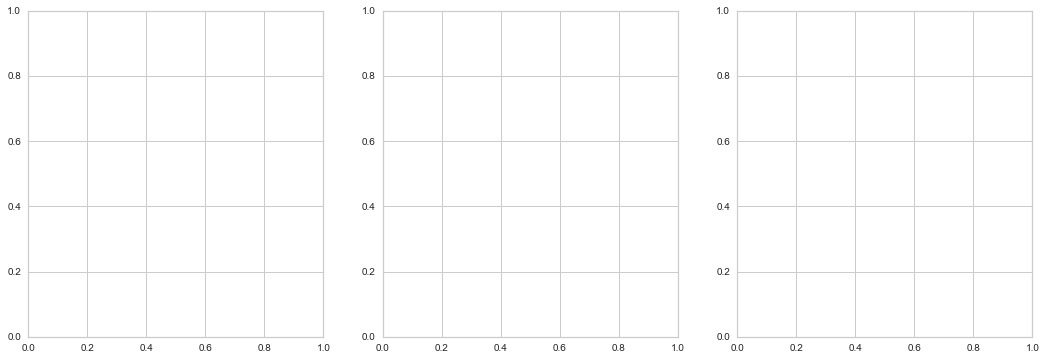

In [70]:
fig, axis = plt.subplots(1, 3, figsize=(18, 6))
for ax, model, name in zip(axis,[kmeans_5x, kmeans_10x, kmeans_15x],["kmeans_5x", "kmeans_10x", "kmeans_15x"]):
    distances = model.transform(X_scaled)
    preds = model.predict(X_scaled)
    inertia_per_cluster = np.array([sum(dist[c]**2 for dist, c in zip(distances, preds) if c == cluster)
        for cluster in range(model.n_clusters)])
    ax.bar(x=range(model.n_clusters), height=inertia_per_cluster)
    ax.set_title(name)
plt.suptitle("Cluster Magnitude")
plt.show()

In [ ]:
X_scaled = X_scaled[:3]

c:\Users\Jordi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- clusters_of_10
- clusters_of_15
- clusters_of_5

  warnings.warn(message, FutureWarning)


ValueError: X has 7 features, but KMeans is expecting 4 features as input.

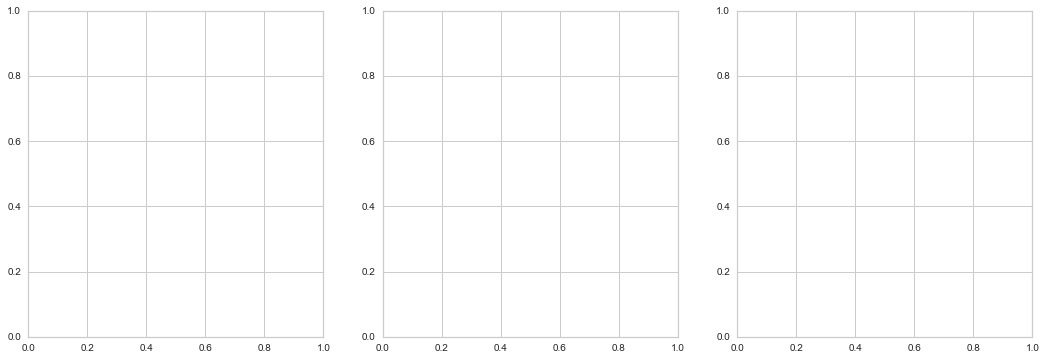

In [ ]:
fig, axis = plt.subplots(1, 3, figsize=(18, 6))
for ax, model, name in zip(axis,[kmeans_5, kmeans_10, kmeans_15],["kmeans_5","kmeans_10", "kmeans_15"]):
    distances = model.transform(df)
    preds = model.predict(df)
    inertia_per_cluster = np.array([sum(dist[c]**2 for dist, c in zip(distances, preds) if c == cluster)
        for cluster in range(model.n_clusters)])
    ax.bar(x=range(model.n_clusters), height=inertia_per_cluster)
    ax.set_title(name)
plt.suptitle("Cluster Magnitude")
plt.show()

> **Question**

Apa yang bisa kamu ambil dari visualisasi di atas? ([ref](https://developers.google.com/machine-learning/clustering/interpret))

### 4.3 Elbow Method

Untuk menggunakan elbow method, kita perlu menghitung **inertia** dari seluruh cluster.

> **inertia** adalah jumlah kuadrat jarak sampel ke pusat cluster terdekat ([ref](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html))

Kita akan mencoba beberapa nilai `k` (jumlah cluster) untuk dihitung nilai inertia-nya. Kemudian, kita akan buat visualisasi tren nilai inertia untuk masing-masing nilai `k`. **Jumlah cluster yang optimal ditentukan secara visual dengan mencari bentuk siku _elbow_ pada plot setelah inertia mulai menurun secara linier**. ([ref](https://towardsdatascience.com/common-mistakes-in-cluster-analysis-and-how-to-avoid-them-eb960116d773))

In [72]:
# sum of squared distances
ssd = []

# may take a longer time to run (takes up to approximately 6 min)
for k in range(1, 6):
    model = KMeans(n_clusters=k, random_state=11)
    print(f"Clustering with n_clusters={k}")
    start = time()
    model.fit(X_scaled)
    print(f"Done clustering in {time()-start:.3f}s")

    ssd.append(model.inertia_)

Clustering with n_clusters=1
Done clustering in 2.609s
Clustering with n_clusters=2
Done clustering in 5.113s
Clustering with n_clusters=3
Done clustering in 7.578s
Clustering with n_clusters=4
Done clustering in 7.831s
Clustering with n_clusters=5
Done clustering in 9.494s


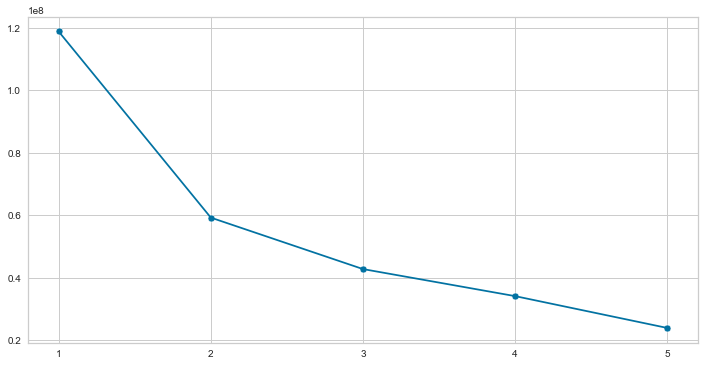

In [73]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(1, 6), y=ssd)
sns.scatterplot(x=range(1, 6), y=ssd)
plt.xticks(range(1, 6))
plt.show()

In [74]:
# sum of squared distances
ssd = []

# may take a longer time to run (takes up to approximately 6 min)
for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=11)
    print(f"Clustering with n_clusters={k}")
    start = time()
    model.fit(df)
    print(f"Done clustering in {time()-start:.3f}s")

    ssd.append(model.inertia_)

Clustering with n_clusters=1
Done clustering in 2.354s
Clustering with n_clusters=2
Done clustering in 4.698s
Clustering with n_clusters=3
Done clustering in 9.465s
Clustering with n_clusters=4
Done clustering in 13.199s
Clustering with n_clusters=5
Done clustering in 15.435s
Clustering with n_clusters=6
Done clustering in 17.986s
Clustering with n_clusters=7
Done clustering in 21.897s
Clustering with n_clusters=8
Done clustering in 23.942s
Clustering with n_clusters=9
Done clustering in 23.948s
Clustering with n_clusters=10
Done clustering in 40.843s


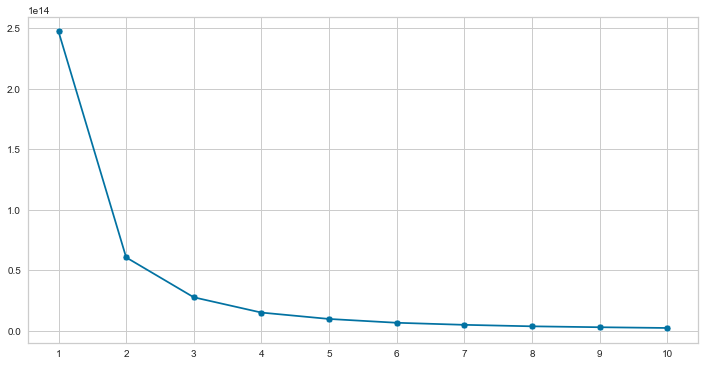

In [75]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(1, 11), y=ssd)
sns.scatterplot(x=range(1, 11), y=ssd)
plt.xticks(range(1, 11))
plt.show()

In [76]:
# sum of squared distances
ssd = []

# may take a longer time to run (takes up to approximately 6 min)
for k in range(1, 16):
    model = KMeans(n_clusters=k, random_state=11)
    print(f"Clustering with n_clusters={k}")
    start = time()
    model.fit(df)
    print(f"Done clustering in {time()-start:.3f}s")

    ssd.append(model.inertia_)

Clustering with n_clusters=1
Done clustering in 2.409s
Clustering with n_clusters=2
Done clustering in 4.828s
Clustering with n_clusters=3
Done clustering in 9.859s
Clustering with n_clusters=4
Done clustering in 10.273s
Clustering with n_clusters=5
Done clustering in 15.468s
Clustering with n_clusters=6
Done clustering in 16.433s
Clustering with n_clusters=7
Done clustering in 18.571s
Clustering with n_clusters=8
Done clustering in 26.577s
Clustering with n_clusters=9
Done clustering in 24.197s
Clustering with n_clusters=10
Done clustering in 31.844s
Clustering with n_clusters=11
Done clustering in 29.085s
Clustering with n_clusters=12
Done clustering in 35.685s
Clustering with n_clusters=13
Done clustering in 40.255s
Clustering with n_clusters=14
Done clustering in 40.180s
Clustering with n_clusters=15
Done clustering in 45.062s


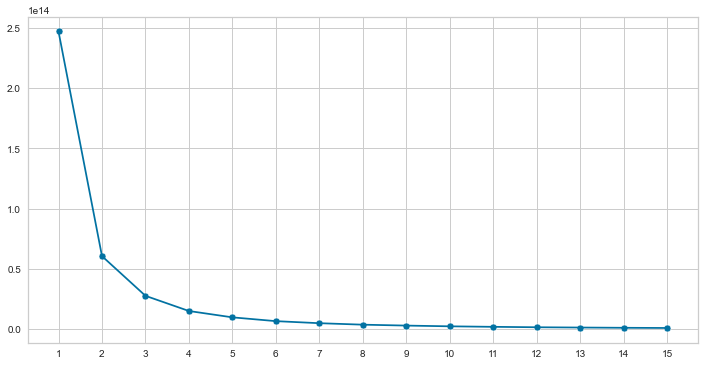

In [77]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(1, 16), y=ssd)
sns.scatterplot(x=range(1, 16), y=ssd)
plt.xticks(range(1, 16))
plt.show()

In [78]:
# sum of squared distances
ssd = []

# may take a longer time to run (takes up to approximately 6 min)
for k in range(1, 16):
    model = KMeans(n_clusters=k, random_state=11)
    print(f"Clustering with n_clusters={k}")
    start = time()
    model.fit(df)
    print(f"Done clustering in {time()-start:.3f}s")

    ssd.append(model.inertia_)

Clustering with n_clusters=1
Done clustering in 2.412s
Clustering with n_clusters=2
Done clustering in 5.060s
Clustering with n_clusters=3
Done clustering in 9.762s
Clustering with n_clusters=4
Done clustering in 11.614s
Clustering with n_clusters=5
Done clustering in 16.810s
Clustering with n_clusters=6
Done clustering in 18.832s
Clustering with n_clusters=7
Done clustering in 21.283s
Clustering with n_clusters=8
Done clustering in 26.897s
Clustering with n_clusters=9
Done clustering in 27.426s
Clustering with n_clusters=10
Done clustering in 35.890s
Clustering with n_clusters=11
Done clustering in 34.809s
Clustering with n_clusters=12
Done clustering in 38.650s
Clustering with n_clusters=13
Done clustering in 34.145s
Clustering with n_clusters=14
Done clustering in 39.259s
Clustering with n_clusters=15
Done clustering in 50.771s


In [79]:
# sum of squared distances
ssd = []

# may take a longer time to run (takes up to approximately 6 min)
for k in range(1, 16):
    model = KMeans(n_clusters=k, random_state=11)
    print(f"Clustering with n_clusters={k}")
    start = time()
    model.fit(X_scaled)
    print(f"Done clustering in {time()-start:.3f}s")

    ssd.append(model.inertia_)

Clustering with n_clusters=1
Done clustering in 2.358s
Clustering with n_clusters=2
Done clustering in 4.533s
Clustering with n_clusters=3
Done clustering in 7.524s
Clustering with n_clusters=4
Done clustering in 8.652s
Clustering with n_clusters=5
Done clustering in 9.290s
Clustering with n_clusters=6
Done clustering in 10.885s
Clustering with n_clusters=7
Done clustering in 12.323s
Clustering with n_clusters=8
Done clustering in 15.915s
Clustering with n_clusters=9
Done clustering in 18.443s
Clustering with n_clusters=10
Done clustering in 22.509s
Clustering with n_clusters=11
Done clustering in 23.397s
Clustering with n_clusters=12
Done clustering in 24.338s
Clustering with n_clusters=13
Done clustering in 27.534s
Clustering with n_clusters=14
Done clustering in 28.990s
Clustering with n_clusters=15
Done clustering in 30.747s


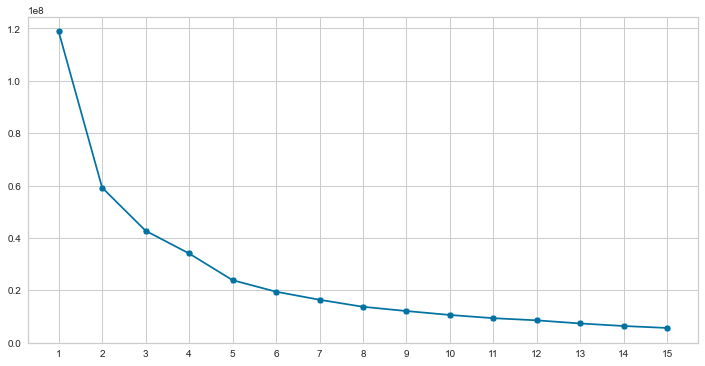

In [80]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(1, 16), y=ssd)
sns.scatterplot(x=range(1, 16), y=ssd)
plt.xticks(range(1, 16))
plt.show()

> Menurut kamu, dari visualisasi di atas, kira-kira berapa jumlah cluster yang paling optimal?

### 4.4 Silhouette Coefficient

* Koefisien silhouette dihitung menggunakan persamaan:

$$
\frac{b-a}{\max{(a, b)}},
$$

* dengan $a$ adalah jarak **intra-cluster**, yaitu jarak antar elemen dalam satu cluster, dan $a$ adalah jarak **inter-cluster**, yaitu jarak suatu elemen dengan elemen lain yang tidak dalam satu cluster yang sama. 

* Nilai koefisien silhouette berada pada rentang antara -1 sampai 1. Jika koefisien silhouette semakin mendekati 1, maka bisa dikatakan cluster yang dihasilkan sudah optimal.

* Kita bisa menggunakan fungsi `silhouette_score` dari scikit-learn.

* Dikarenakan data kita yang cukup besar maka untuk latihan simulasi mendapatkan nilai silhouette, kita akan coba lakukan ambil 20% dari X_scaled.

In [81]:
limit = int(len(X_scaled)*0.2)
X_scaled_sample = X_scaled[0:limit]

In [ ]:
df_sample = df[0:int(len(df)*0.2)]

In [82]:
silhouette_scores = []

# INFORMATION
# It may take a longer time to run, the sample data took around 46m 30s to be completed

for k in range(2, 21):
    model = KMeans(n_clusters=k, random_state=11)
    print(f"Clustering with n_clusters={k}")
    start = time()
    model.fit(X_scaled_sample)
    print(f"Done clustering in {time()-start:.3f}s")

    print("Calculating silhouette coefficient..")
    start = time()
    silhouette_scores.append(silhouette_score(X_scaled_sample, model.labels_))
    print(f"Done calculating in {time()-start:.3f}s")

Clustering with n_clusters=2
Done clustering in 0.968s
Calculating silhouette coefficient..


In [ ]:
silhouette_scores = []

# INFORMATION
# It may take a longer time to run, the sample data took around 46m 30s to be completed

for k in range(2, 21):
    model = KMeans(n_clusters=k, random_state=11)
    print(f"Clustering with n_clusters={k}")
    start = time()
    model.fit(df)
    print(f"Done clustering in {time()-start:.3f}s")

    print("Calculating silhouette coefficient..")
    start = time()
    silhouette_scores.append(silhouette_score(df, model.labels_))
    print(f"Done calculating in {time()-start:.3f}s")

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(2, 21), y=silhouette_scores)
sns.scatterplot(x=range(2, 21), y=silhouette_scores)
plt.xticks(range(1, 20))
plt.show()

> **Questions** 

Apa yang bisa kamu ambil dari visualisasi silhouette score di atas? Berapa jumlah cluster dengan nilai silhouette coefficient yang paling besar?

> **Catatan:**
> Untuk kasus segmentasi customer, sebenarnya tidak cukup hanya sampai membuat cluster. Akan tetapi, hasil dari clustering kemudian akan digunakan untuk melakukan eksplorasi lebih lanjut untuk mengetahui karakteristik masing-masing cluster.